In [1]:
import laspy
import glob, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tree_files = glob.glob('/nas2/YJ/DATA/tree_s60/training/velodyne/*.las')

In [3]:
len(tree_files)

323

In [4]:
# POINT_CLOUD_RANGE: [-30, -30, 0, 30, 30, 32]
# VOXEL_SIZE: [0.16, 0.16, 4]
# MAX_NUMBER_OF_VOXELS: {
#            'train': 16000,
#            'test': 40000
#          }

In [7]:
# if voxel size is 0.25m, psuedo image be 248*248(60/0.25)
x_voxel_size = 0.25
y_voxel_size = 0.25
x_range_min = -30.0
x_range_max = 30.0
y_range_min = -30.0
y_range_max = 30.0
z_range_min = 0.0
z_range_max = 32.0


x_size = int((x_range_max-x_range_min)/x_voxel_size)
y_size = int((y_range_max-y_range_min)/y_voxel_size)
pseudo_image = np.zeros((x_size, y_size))
print ('{}m and {}m of lidar ==> {}px and {}px of pseudo_image'.format(
    x_range_max-x_range_min,
    y_range_max-y_range_min,
    pseudo_image.shape[0],
    pseudo_image.shape[1]))

60.0m and 60.0m of lidar ==> 240px and 240px of pseudo_image


In [8]:
idxes = np.random.randint(len(tree_files), size=10)
images=[]
non_zeros=[]
for idx in idxes :
    print (100*'#')
    print ('file: ', tree_files[idx])
    lasfile = laspy.file.File(tree_files[idx], mode="r")
    points = np.vstack((lasfile.x-30, lasfile.y-30
                         , lasfile.z-300)).transpose()
    print ('num_of_points: {}'.format(points.shape[0]))
    print ('range_of_x: {} to {}'.format(min(points[:,0]), max(points[:,0])))
    print ('range_of_y: {} to {}'.format(min(points[:,1]), max(points[:,1])))
    print ('range_of_z: {} to {}'.format(min(points[:,2]), max(points[:,2])))
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min <= point[0] <= x_range_max \
        and y_range_min <= point[1] <= y_range_max \
        and z_range_min <= point[2] <= z_range_max:
            r = int((point[0]-x_range_min - 0.00001)//x_voxel_size)
            c = int((point[1]-y_range_min - 0.00001)//y_voxel_size)
            pseudo_image[r,c] +=1
    images.append(pseudo_image)
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
    print ('non-zero_voxels: {} voxel'.format(non_x.shape[0]))
    print ('non-zero_ratio: {:.2f} %'.format(100* (non_x.shape[0]/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/10.0))

####################################################################################################
file:  /nas2/YJ/DATA/tree_s60/training/velodyne/T667.las
num_of_points: 645983
range_of_x: -30.01 to 30.009999999999998
range_of_y: -30.01 to 30.009999999999998
range_of_z: 9.740000000000009 to 19.920000000000016
non-zero_voxels: 57520 voxel
non-zero_ratio: 99.86 %
####################################################################################################
file:  /nas2/YJ/DATA/tree_s60/training/velodyne/T854.las
num_of_points: 610249
range_of_x: -30.01 to 30.009999999999998
range_of_y: -30.01 to 30.009999999999998
range_of_z: 13.660000000000025 to 30.639999999999986
non-zero_voxels: 57372 voxel
non-zero_ratio: 99.60 %
####################################################################################################
file:  /nas2/YJ/DATA/tree_s60/training/velodyne/T302.las
num_of_points: 381252
range_of_x: -30.01 to 30.009999999999998
range_of_y: -30.01 to 30.009999999999998
ran

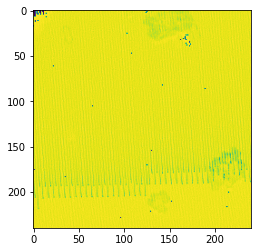

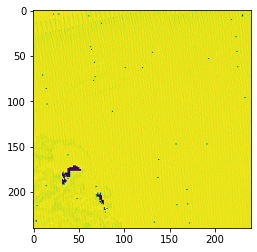

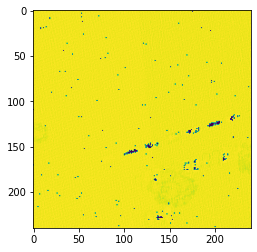

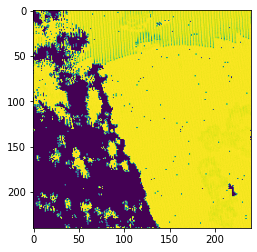

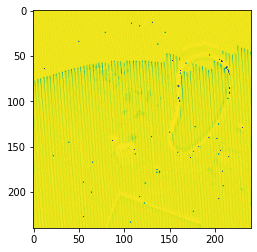

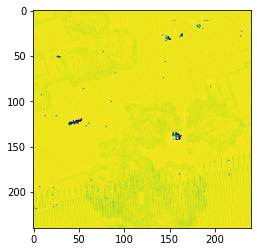

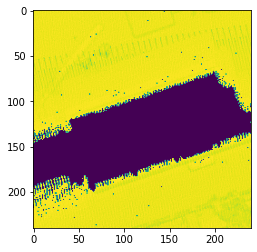

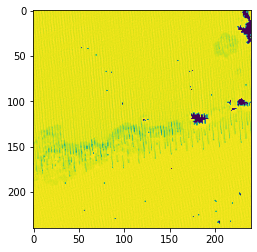

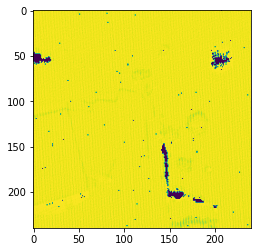

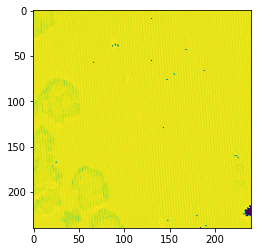

In [9]:
for im in images :
    img = Image.fromarray(np.uint8(im* 255), 'L')
    plt.figure()
    plt.imshow(img)

In [11]:
non_zeros=[]
for idx in range(len(tree_files)) : 
    lasfile = laspy.file.File(tree_files[idx], mode="r")
    points = np.vstack((lasfile.x-30, lasfile.y-30
                         , lasfile.z-300)).transpose()
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min < point[0] < x_range_max \
        and y_range_min < point[1] < y_range_max \
        and z_range_min < point[2] < z_range_max:
            r = int((point[0]-x_range_min)//x_voxel_size)
            c = int((point[1]-y_range_min)//y_voxel_size)
            pseudo_image[r,c] +=1
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
print ('non-zero_ratio: {:.2f} %'.format(100* (sum(non_zeros)/len(tree_files)/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/len(tree_files)))

non-zero_ratio: 93.95 %
average number of non_zeros: 54116.63


In [13]:
# if voxel size is 0.25m, psuedo image be 248*248(60/0.25)
x_voxel_size = 0.1875
y_voxel_size = 0.1875
x_range_min = -30.0
x_range_max = 30.0
y_range_min = -30.0
y_range_max = 30.0
z_range_min = 0.0
z_range_max = 32.0


x_size = int((x_range_max-x_range_min)/x_voxel_size)
y_size = int((y_range_max-y_range_min)/y_voxel_size)
pseudo_image = np.zeros((x_size, y_size))
print ('{}m and {}m of lidar ==> {}px and {}px of pseudo_image'.format(
    x_range_max-x_range_min,
    y_range_max-y_range_min,
    pseudo_image.shape[0],
    pseudo_image.shape[1]))

60.0m and 60.0m of lidar ==> 320px and 320px of pseudo_image


In [14]:
idxes = np.random.randint(len(tree_files), size=10)
images=[]
non_zeros=[]
for idx in idxes :
    print (100*'#')
    print ('file: ', tree_files[idx])
    lasfile = laspy.file.File(tree_files[idx], mode="r")
    points = np.vstack((lasfile.x-30, lasfile.y-30
                         , lasfile.z-300)).transpose()
    print ('num_of_points: {}'.format(points.shape[0]))
    print ('range_of_x: {} to {}'.format(min(points[:,0]), max(points[:,0])))
    print ('range_of_y: {} to {}'.format(min(points[:,1]), max(points[:,1])))
    print ('range_of_z: {} to {}'.format(min(points[:,2]), max(points[:,2])))
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min <= point[0] <= x_range_max \
        and y_range_min <= point[1] <= y_range_max \
        and z_range_min <= point[2] <= z_range_max:
            r = int((point[0]-x_range_min - 0.00001)//x_voxel_size)
            c = int((point[1]-y_range_min - 0.00001)//y_voxel_size)
            pseudo_image[r,c] +=1
    images.append(pseudo_image)
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
    print ('non-zero_voxels: {} voxel'.format(non_x.shape[0]))
    print ('non-zero_ratio: {:.2f} %'.format(100* (non_x.shape[0]/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/10.0))

####################################################################################################
file:  /nas2/YJ/DATA/tree_s60/training/velodyne/T500.las
num_of_points: 577235
range_of_x: -30.01 to 30.009999999999998
range_of_y: -30.01 to 30.009999999999998
range_of_z: 14.03000000000003 to 55.120000000000005
non-zero_voxels: 68271 voxel
non-zero_ratio: 66.67 %
####################################################################################################
file:  /nas2/YJ/DATA/tree_s60/training/velodyne/T514.las
num_of_points: 122267
range_of_x: -30.01 to 30.009999999999998
range_of_y: -30.01 to 30.009999999999998
range_of_z: 9.550000000000011 to 34.95999999999998
non-zero_voxels: 44928 voxel
non-zero_ratio: 43.88 %
####################################################################################################
file:  /nas2/YJ/DATA/tree_s60/training/velodyne/T526.las
num_of_points: 419613
range_of_x: -30.01 to 30.009999999999998
range_of_y: -30.01 to 30.009999999999998
range

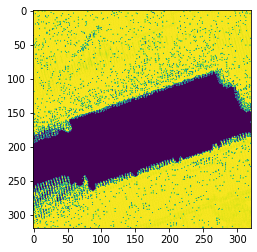

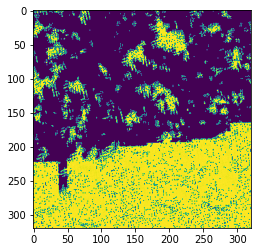

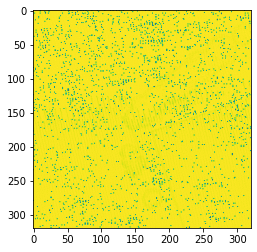

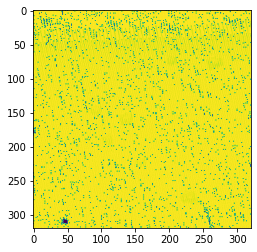

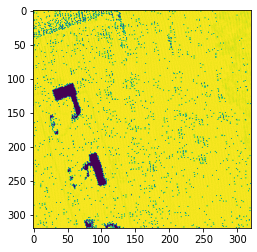

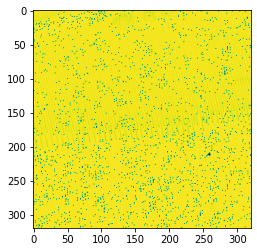

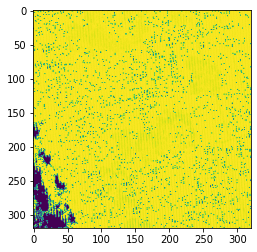

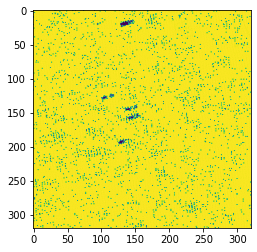

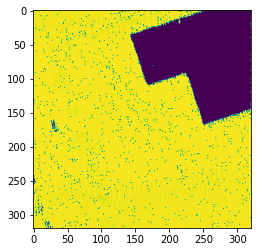

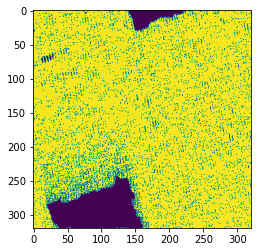

In [15]:
for im in images :
    img = Image.fromarray(np.uint8(im* 255), 'L')
    plt.figure()
    plt.imshow(img)

In [16]:
non_zeros=[]
for idx in range(len(tree_files)) : 
    lasfile = laspy.file.File(tree_files[idx], mode="r")
    points = np.vstack((lasfile.x-30, lasfile.y-30
                         , lasfile.z-300)).transpose()
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min < point[0] < x_range_max \
        and y_range_min < point[1] < y_range_max \
        and z_range_min < point[2] < z_range_max:
            r = int((point[0]-x_range_min)//x_voxel_size)
            c = int((point[1]-y_range_min)//y_voxel_size)
            pseudo_image[r,c] +=1
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
print ('non-zero_ratio: {:.2f} %'.format(100* (sum(non_zeros)/len(tree_files)/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/len(tree_files)))

non-zero_ratio: 91.35 %
average number of non_zeros: 93541.06
